In [49]:
import pandas as pd
import numpy as np
import h5py

In [50]:
h5_file_path = "C:/Git/12-lead-ECG_CNN-BiLSTM/dataset/features.h5"

In [51]:
with h5py.File(h5_file_path, 'r') as store:
    signal = store['ecg'][:]
    label = store['label'][:]

In [52]:
signal.shape

(2400, 5000, 12)

In [53]:
def z_score_normalization(signal):
    mean = np.mean(signal)
    std_dev = np.std(signal)
    normalized_signal = (signal - mean) / std_dev
    return normalized_signal

# NORMALIZE -> SINGLE LEAD

In [54]:
signal_list = []
for i in range(signal.shape[0]): # i : subject nbr
    normalized_arrays = [z_score_normalization(signal[i,:,l]) for l in range(signal.shape[2])] # l : lead nbr
    combined_array = np.concatenate(normalized_arrays)
    signal_list.append(combined_array)
print(len(signal_list))
print(len(signal_list[0]))

2400
60000


In [55]:
np_signal = np.array(signal_list)
print(np_signal.shape)

(2400, 60000)


In [62]:
len(label), type(label)

(2400, numpy.ndarray)

In [63]:
with h5py.File("./normalized_sigle_lead_features.h5", 'w') as f:
    f.create_dataset('ecg', data=np_signal)
    f.create_dataset('label', data=np.array(label))

# SINGLE LEAD -> NORMALIZE

In [65]:
signal_list2 = []
for i in range(signal.shape[0]): # i : subject nbr
    normalized_arrays = [signal[i,:,l] for l in range(signal.shape[2])] # l : lead nbr
    combined_array = np.concatenate(normalized_arrays)
    normalized_combined_array = z_score_normalization(combined_array)
    signal_list2.append(normalized_combined_array)
print(len(signal_list2))
print(len(signal_list2[0]))

2400
60000


In [66]:
np_signal2 = np.array(signal_list2)
print(np_signal2.shape)

(2400, 60000)


In [67]:
len(label), type(label)

(2400, numpy.ndarray)

In [68]:
with h5py.File("./sigle_lead_normalized_features.h5", 'w') as f:
    f.create_dataset('ecg', data=np_signal)
    f.create_dataset('label', data=np.array(label))

# Visualize

In [69]:
k = 0

normalized_arrays = [signal[k,:,l] for l in range(signal.shape[2])]
kth_combined0 = np.concatenate(normalized_arrays)

kth_combined1 = np_signal[k]

kth_combined2 = np_signal2[k]

In [70]:
len(kth_combined0), len(kth_combined1), len(kth_combined2)

(60000, 60000, 60000)

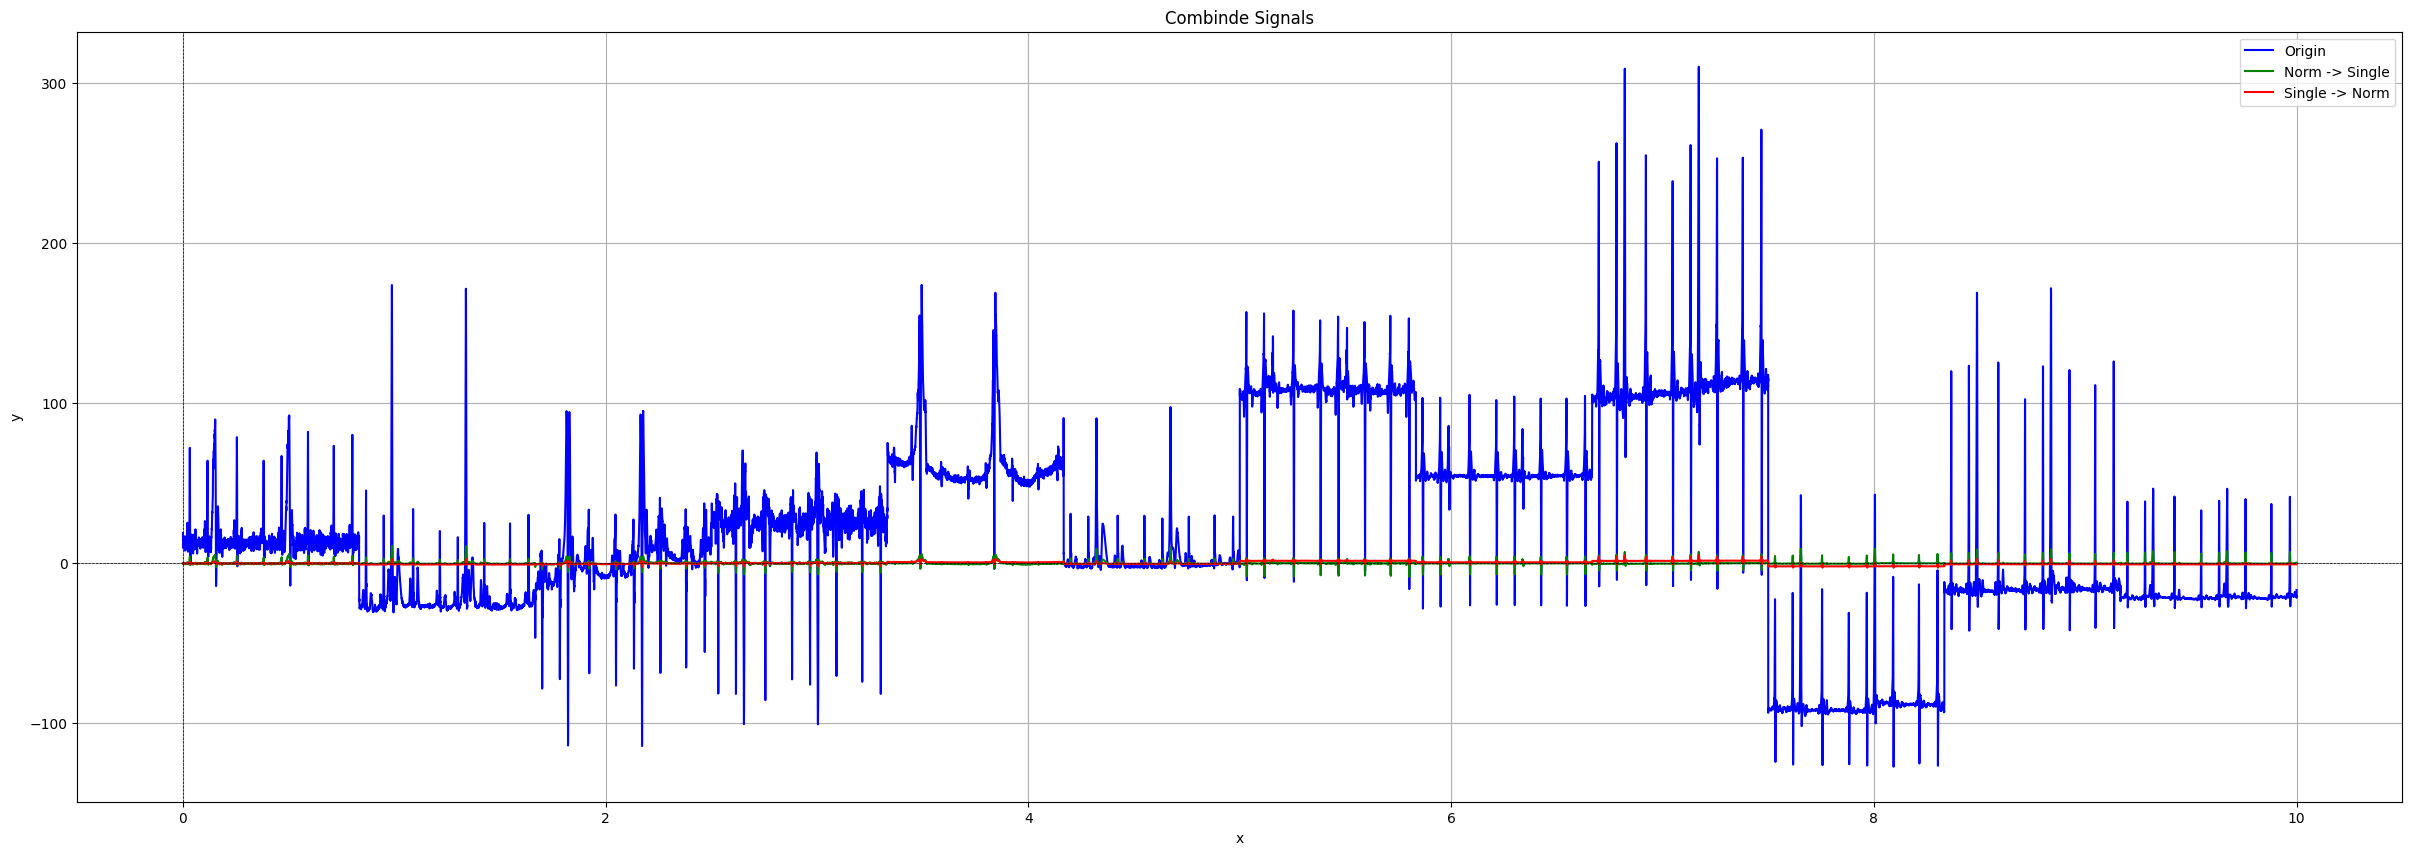

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


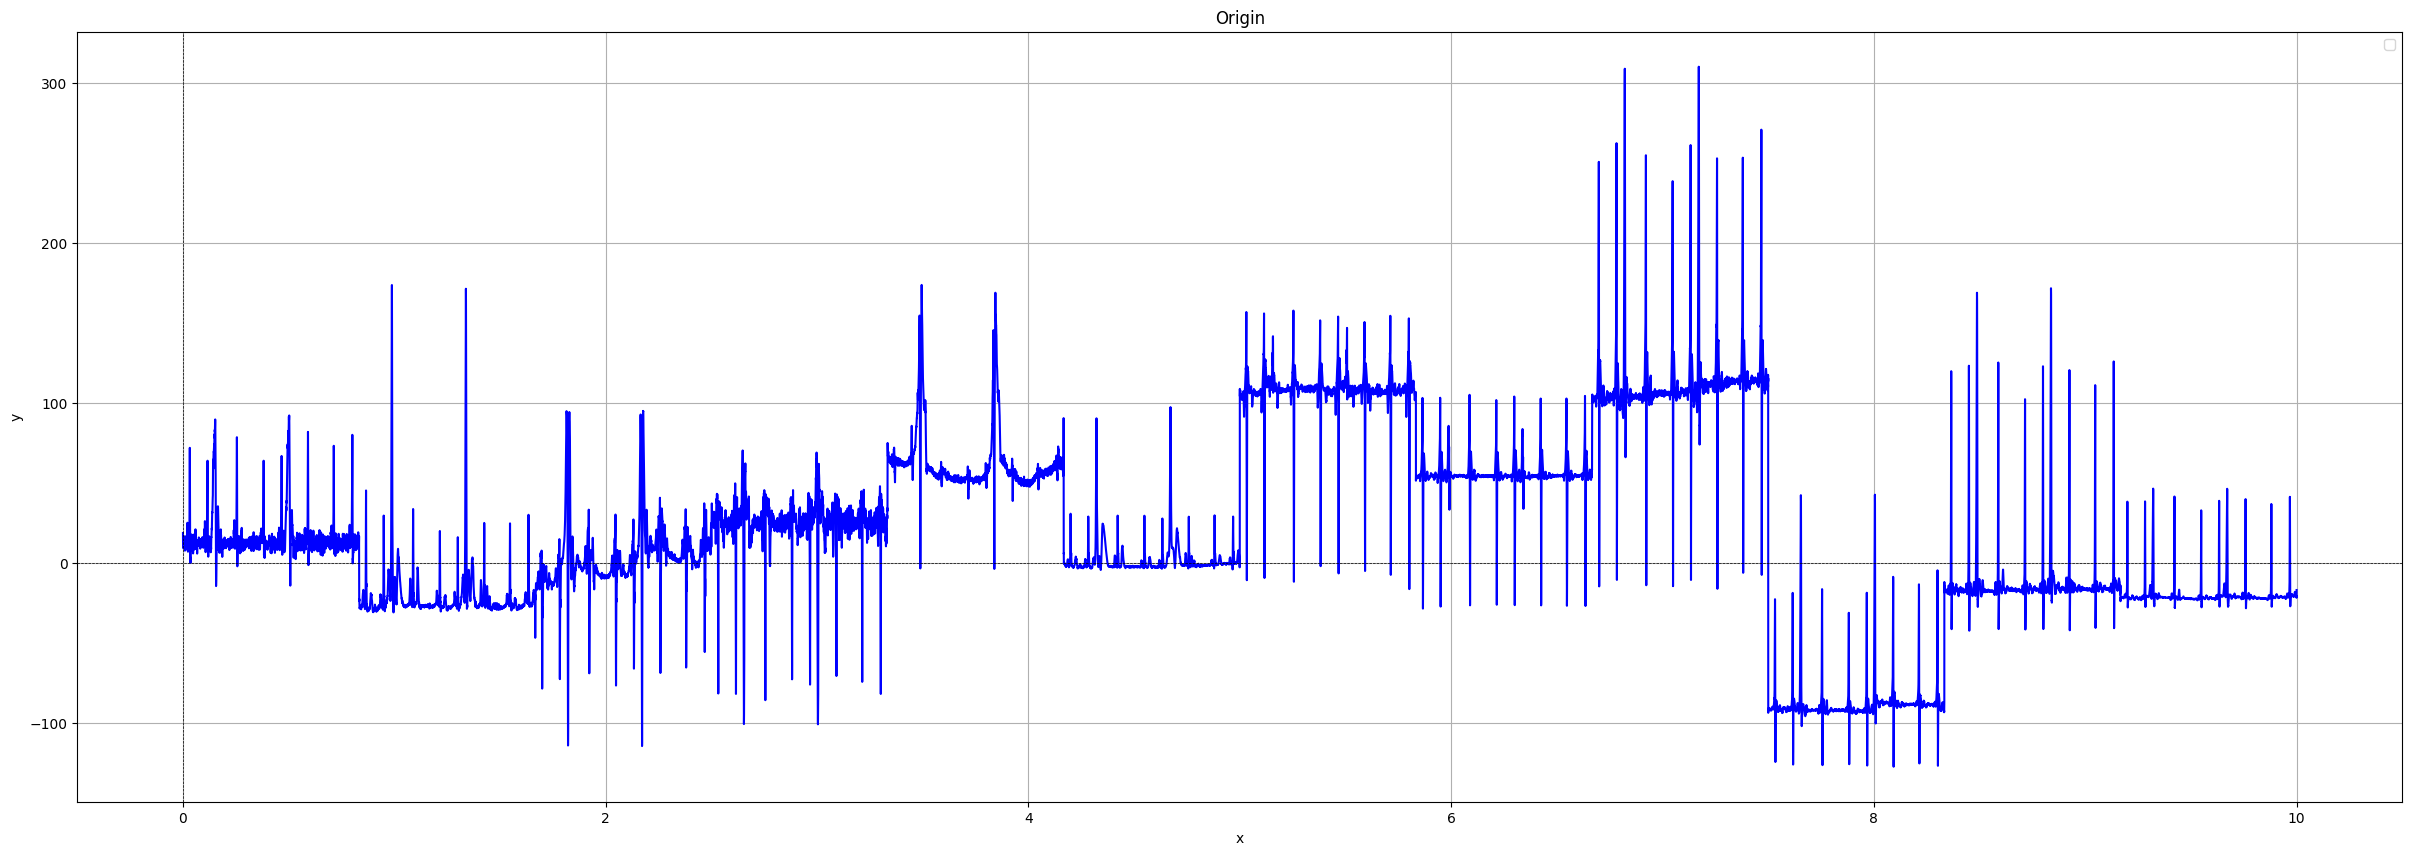

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


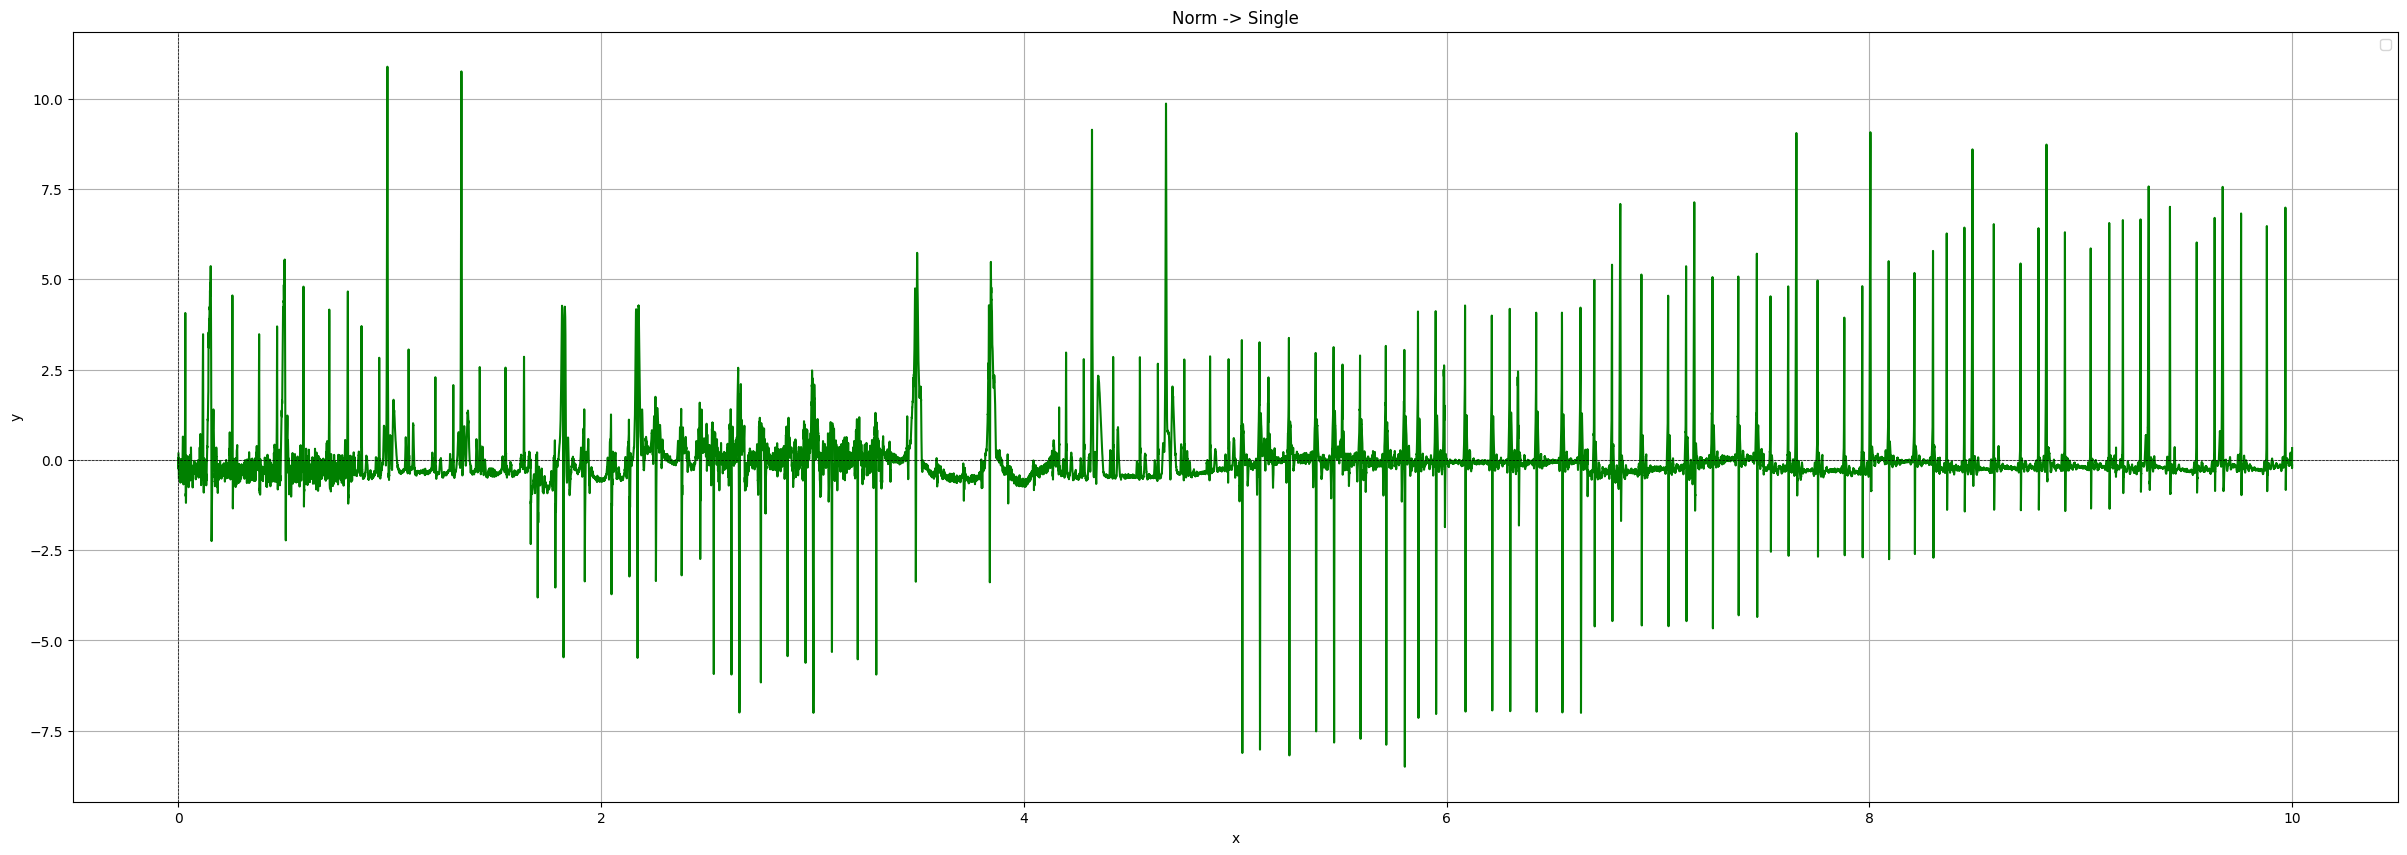

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


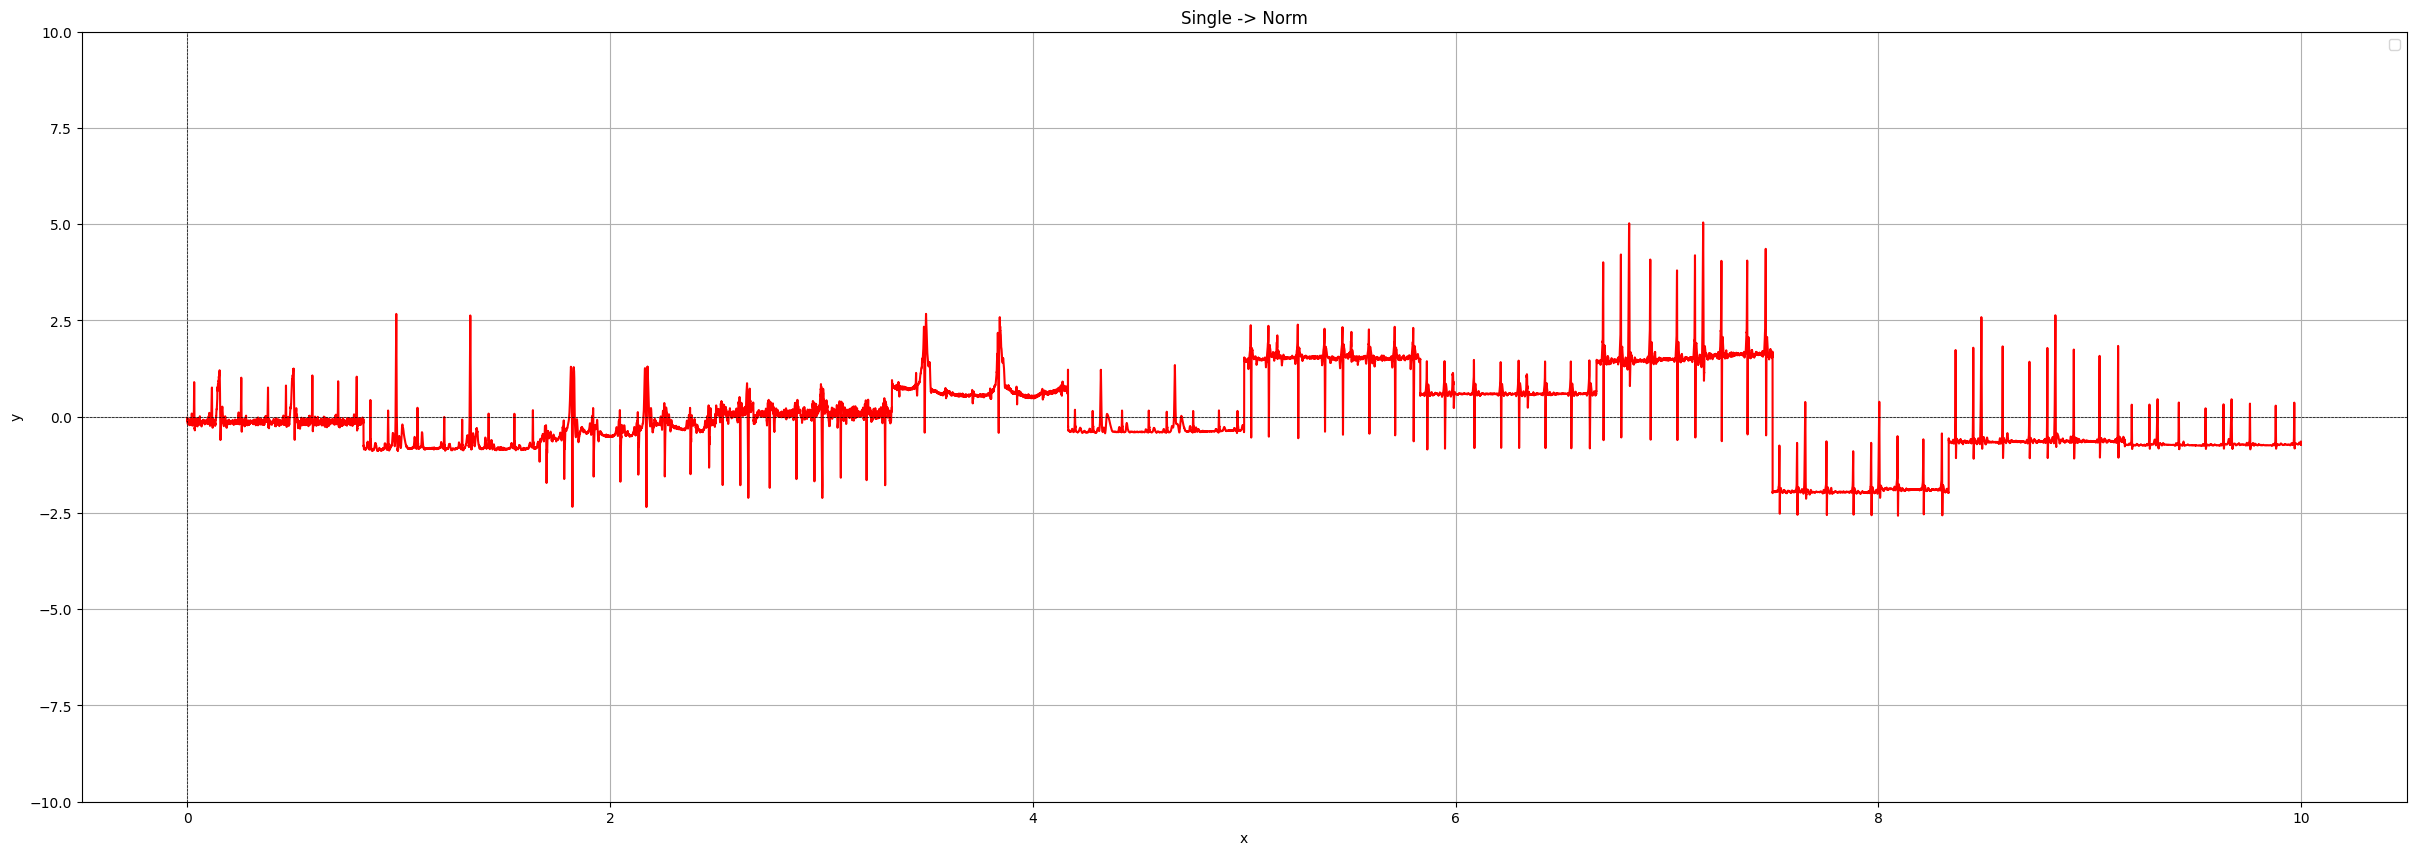

In [74]:
import matplotlib.pyplot as plt

# 예시: 3개의 배열 생성
x = np.linspace(0, 10, 60000)

# 1. 모든 배열을 한 플롯에 그리기
plt.figure(figsize=(30, 10))
plt.plot(x, kth_combined0, label='Origin', color='blue')
plt.plot(x, kth_combined1, label='Norm -> Single', color='green')
plt.plot(x, kth_combined2, label='Single -> Norm', color='red')
plt.title('Combinde Signals')
plt.xlabel('x')
plt.ylabel('y')
# plt.ylim(-10, 10)  # tan 함수의 범위를 조정
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

# 2. 각각의 배열을 개별적인 플롯으로 그리기
# 첫 번째 배열
plt.figure(figsize=(30, 10))
plt.plot(x, kth_combined0, color='blue')
plt.title('Origin')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

# 두 번째 배열
plt.figure(figsize=(30, 10))
plt.plot(x, kth_combined1, color='green')
plt.title('Norm -> Single')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

# 세 번째 배열
plt.figure(figsize=(30, 10))
plt.plot(x, kth_combined2, color='red')
plt.title('Single -> Norm')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10, 10)  # tan 함수의 범위를 조정
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()